Author: Richard Kha

Email: kharichard@csu.fullerton.edu

CPSC 483 - 01

Project 7 - Clustering and Customer Segmentation

In this project, we are clustering customers to determine what types of products they shop for and what they may shop for in the future. By looking into their purchasing data, we can separate customers into groups by clustering their data and determine what they would most likely shop for in the future by analyzing what they already shop for. Grouping the customers together will help in generalizing what they would most likely purchase in the future and potentially advertise similar products to them in the future.

Experiment Answers Section

2. There are 8 clusters using default parameters.

3. For the minimums of each clusters, there seems to be high minimums with beer, diapers, and steak while the rest hav relatively similar minimums. Many clusters do not have minimums for the cluster labels. In regards to maximums, there seems to be more maximum data for the clusters compared to minimums, although some clusters still do not have maximum data. The means are a mix of mins and maxes but overall, it seems that clusters 3 and 4 have the most fitting data as the rest of the clusters have more missing mins and maxes. Overall, the clusters are messy as they separate them into groups that either prefer very few specific items or most of them together.

4. Based on the dendrogram, there seems to be about 4 clusters.

6. The label assignments are different compared to using Kmeans clustering. The datatype is different as well as the agglomerative clustering is dtype 64 compared to the dtype of 32 for kmeans.

7. For cluster 0, these group of people seem to be the family type as they buy regular groceries for meals and diapers, meaning they have young children. For cluster 1, they buy lots of beer and steak, meaning they adults with some money to spend. For cluster 2, they buy products with high protein such as broccoli, steak, and eggs, so they may be people who exercise often. For cluster 3, they buy fruits and vegatables but no meats or dairy, meaning they could be vegetarians or something along that line.

8. For the first group, they would be more inclined to buy fruits, vegatables, potentially baby food, and other general groceries for healthy meals. They would not be likely to buy unhealthy foods for their family. The second cluster group, they would meats, alcohol, and other forms of generalized bbq party food. They would probably not buy fruits and vegetables. For the third group, they would buy high protein and more exercise like food such as beans, nuts, meats, and certain vegatables. They would probably not buy high carb products. The last group is more inclined to buy fruit and vegatable products that don't have to do with animal products. They seem to stay away from animal or processed products so they may enjoy more natural items.

In [1]:
#Part 1
import pandas as pd

#Load the data
df = pd.read_csv('spending.csv')


In [2]:
#Part 2
from sklearn.cluster import KMeans
import pandas as pd

#Cluster data with default parameters
kmeans = KMeans().fit(df)

#Create new dataframe to not mix up label data
df1 = df

#Assign labels to new column in dataframe
df1['labels'] = kmeans.labels_

#Print the dataframe
#print (df1)

#Determine amount of clusters (8)
print ('The number of clusters:', len(kmeans.cluster_centers_))

The number of clusters: 8


In [3]:
#Part 3
import pandas as pd

#Group data
group = df1.groupby(['labels'])

#Find minimums, maximums, and means
mins = group.min()
maxes = group.max()
means = group.mean()

#Print the data
print (mins)
print ('----------------------------------------')
print (maxes)
print ('----------------------------------------')
print (means)


        apples  bananas  beer  bread  broccoli  diapers  eggs  milk  potatoes  \
labels                                                                          
0            0        0     0      0         0        0     0     0         2   
1            7        7     4      5         0       29     2     5         1   
2            0        0     0      0         4        0    10     0         0   
3            1        0     0      0         8        0     0     0         5   
4            0        0    33      0         0        0     0     0         0   
5            0        0     0      0         3        0    10     0         0   
6            0        0    21      0         0        0     0     0         1   
7            6        5     5      7         0       17     0     4         1   

        steak  
labels         
0          20  
1           0  
2           8  
3           0  
4          23  
5          19  
6          17  
7           0  
-----------------------------

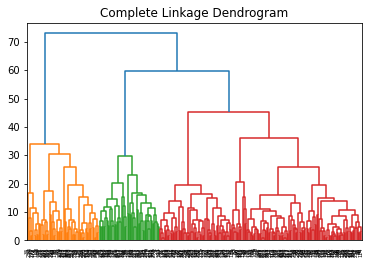

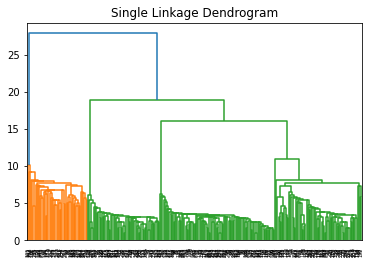

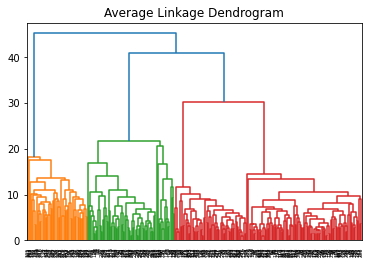

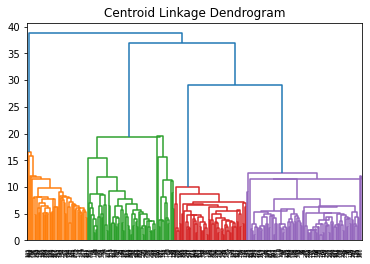

In [4]:
#Part 4
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

#Create dendrograms for each linkage type using hierarchal clustering
#Takes a while to load

#Complete linkage dendrogram
Z = hierarchy.linkage(df1, 'complete')
plt.figure()
plt.title('Complete Linkage Dendrogram')
dn = hierarchy.dendrogram(Z)

#Single linkage dendrogram
ZZ = hierarchy.linkage(df1, 'single')
plt.figure()
plt.title('Single Linkage Dendrogram')
dn = hierarchy.dendrogram(ZZ)

#Average linkage dendrogram
ZZZ = hierarchy.linkage(df1, 'average')
plt.figure()
plt.title('Average Linkage Dendrogram')
dn = hierarchy.dendrogram(ZZZ)

#Centroid linkage dendrogram
ZZZZ = hierarchy.linkage(df1, 'centroid')
plt.figure()
plt.title('Centroid Linkage Dendrogram')
dn = hierarchy.dendrogram(ZZZZ)

In [5]:
#Part 5
#Repeat part 2 with specified clusters
from sklearn.cluster import KMeans

#Cluster data with default parameters
kmeans_new = KMeans(n_clusters = 4).fit(df)

#Create new dataframe to not mix up labels
df2 = df

#Print new labels
print (kmeans_new.labels_)

#Assign labels to new column in dataframe
df2['labels'] = kmeans_new.labels_

#Print dataframe with new labels added
#print (df2)

[3 2 2 0 0 0 3 1 0 2 0 3 1 0 0 3 3 3 0 1 0 1 2 2 1 0 2 1 0 0 3 3 1 3 1 3 0
 2 3 1 0 3 0 3 0 1 3 2 1 3 3 1 1 0 1 1 1 2 0 3 3 3 3 3 3 3 1 3 3 0 0 3 3 3
 1 1 0 2 3 3 0 0 0 2 2 3 3 0 3 0 0 2 2 2 1 3 3 3 3 3 3 1 2 0 1 2 2 3 0 0 3
 3 3 3 3 0 0 3 1 3 1 0 1 1 0 0 0 2 3 2 3 1 2 2 0 3 3 3 0 3 3 1 3 0 1 1 1 3
 3 2 1 1 1 3 1 3 0 2 0 2 2 3 2 3 1 3 3 1 3 3 2 1 0 1 1 3 2 0 0 3 3 1 1 1 2
 2 0 0 0 2 2 3 0 0 2 2 3 3 2 1 0 0 3 0 0 1 1 0 1 0 0 0 0 3 3 2 2 3 1 0 3 3
 3 3 3 0 1 3 0 3 0 3 2 2 2 2 3 3 0 0 1 2 0 0 2 2 2 1 3 1 1 1 2 3 3 1 3 0 3
 3 1 0 2 0 0 3 3 2 3 0 1 0 3 3 2 3 2 1 2 1 3 1 3 1 3 0 1 3]


In [6]:
#Part 6
from sklearn.cluster import AgglomerativeClustering

#Use agglomerative clustering with same number of clusters from part 5
a_cluster = AgglomerativeClustering(n_clusters = 4).fit(df2)

#Create new dataframe to not mix up labels
df3 = df

#Print new labels
a_cluster.labels_

array([1, 2, 2, 0, 0, 0, 1, 3, 0, 2, 0, 1, 3, 0, 0, 1, 1, 1, 0, 3, 0, 3,
       2, 2, 3, 0, 2, 3, 0, 0, 1, 1, 3, 1, 3, 1, 0, 2, 1, 3, 0, 1, 0, 0,
       0, 3, 1, 2, 3, 1, 1, 3, 3, 0, 3, 3, 3, 2, 0, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 0, 0, 1, 1, 1, 3, 3, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 1, 0,
       0, 0, 0, 2, 2, 2, 3, 1, 1, 1, 1, 1, 1, 3, 2, 0, 3, 2, 2, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 3, 1, 3, 0, 3, 3, 0, 0, 0, 2, 1, 2, 1, 3,
       2, 2, 0, 1, 1, 1, 0, 1, 1, 3, 1, 0, 3, 3, 3, 1, 1, 2, 3, 3, 3, 1,
       3, 1, 0, 2, 0, 2, 2, 1, 2, 1, 3, 1, 1, 3, 1, 1, 2, 3, 0, 3, 3, 1,
       2, 0, 0, 1, 1, 3, 3, 3, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 2, 1, 1,
       2, 3, 0, 0, 1, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 1, 1, 2, 2, 1, 3, 0,
       1, 1, 1, 1, 1, 0, 3, 1, 0, 1, 0, 1, 2, 2, 2, 2, 1, 1, 0, 0, 3, 2,
       0, 0, 2, 2, 2, 3, 1, 3, 3, 3, 2, 1, 1, 3, 1, 0, 1, 1, 3, 0, 2, 0,
       0, 1, 1, 2, 1, 0, 3, 0, 1, 1, 2, 1, 2, 3, 2, 3, 1, 3, 1, 3, 1, 0,
       3, 1], dtype=int64)

In [7]:
#Part 7

#Group data with new dataframe of 4 clusters
group1 = df2.groupby(['labels'])

#Find minimums, maximums, and means
mins = group1.min()
maxes = group1.max()
means = group1.mean()

#Print the data
print (mins)
print ('----------------------------------------')
print (maxes)
print ('----------------------------------------')
print (means)


        apples  bananas  beer  bread  broccoli  diapers  eggs  milk  potatoes  \
labels                                                                          
0            0        0     6      0         0        0     0     0         0   
1            1        0     0      0         8        0     0     0         5   
2            6        5     4      5         0       17     0     4         1   
3            0        0     0      0         0        0     0     0         0   

        steak  
labels         
0          17  
1           0  
2           0  
3           8  
----------------------------------------
        apples  bananas  beer  bread  broccoli  diapers  eggs  milk  potatoes  \
labels                                                                          
0            0        0    50      8         0        0     0     0         8   
1           14       17     0      0        22        0     0     0        15   
2           18       16    12     20         0      